In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC    
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
# importing the training data
dataset = pd.read_csv(r"E:\GitHub Tutorial\Machine-Learning\Titanic\train.csv")

X = dataset.iloc[:,[2,4,5,6,7,9,11]].values
Y = dataset.iloc[:,1].values

In [3]:
# importing the testing data
testdataset = pd.read_csv(r"E:\GitHub Tutorial\Machine-Learning\Titanic\test.csv")
X_test = testdataset.iloc[:,[1,3,4,5,6,8,10]].values

In [4]:
# handling missing values in the dataset
missingvalues1 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
missingvalues1 = missingvalues1.fit(X[:,[2]])
X[:,[2]] = missingvalues1.transform(X[:,[2]])
missingvalues2 = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
missingvalues2 = missingvalues2.fit(X[:,[6]])
X[:,[6]] = missingvalues2.transform(X[:,[6]])
missingvalues3 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
missingvalues3 = missingvalues3.fit(X_test[:,[2]])
X_test[:,[2]] = missingvalues3.transform(X_test[:,[2]])
missingvalues4 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
missingvalues4 = missingvalues4.fit(X_test[:,[5]])
X_test[:,[5]] = missingvalues4.transform(X_test[:,[5]])

In [5]:
# split into train test sets
X, X_split_test, Y, Y_split_test = train_test_split(X, Y, test_size=0.25)

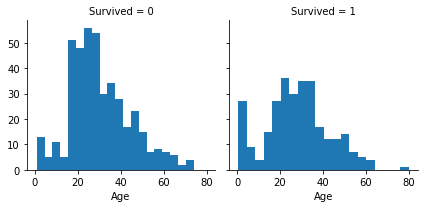

In [6]:
# Age Graph
age_graph = sns.FacetGrid(dataset, col='Survived')
age_graph.map(plt.hist, 'Age', bins=20)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


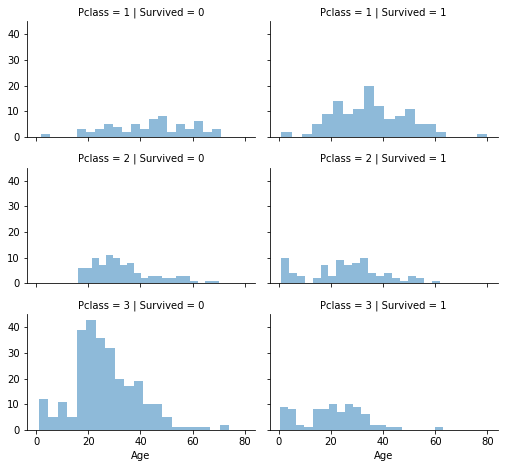

In [7]:
# P-Class v/s Survived Graph Graph
grid = sns.FacetGrid(dataset, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


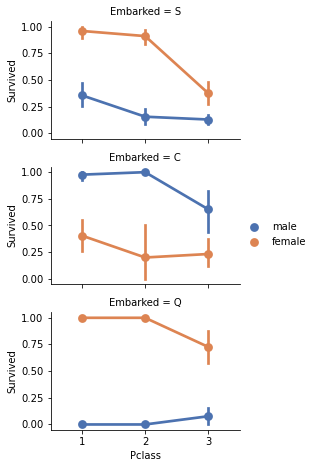

In [8]:
# Embarked Graph
grid = sns.FacetGrid(dataset, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


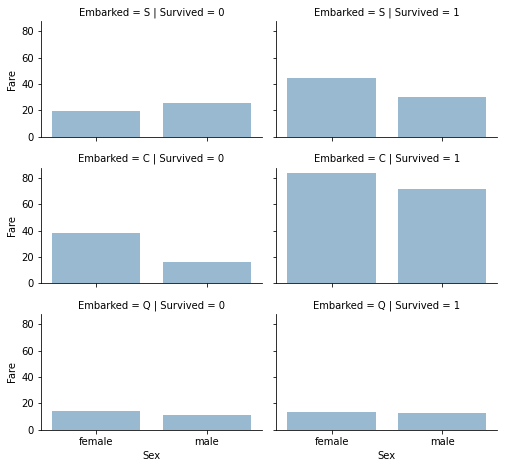

In [9]:
# Embarked v/s Survived Graph
grid = sns.FacetGrid(dataset, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

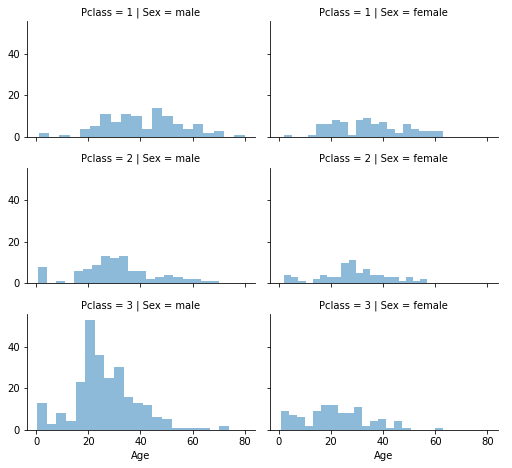

In [10]:
# P-Class v/s Sex Graph
grid = sns.FacetGrid(dataset, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [11]:
# encoding categorical data
labelencoder1 = LabelEncoder()
X[:, 1] = labelencoder1.fit_transform(X[:,1])
labelencoder2 = LabelEncoder()
X[:, 6] = labelencoder2.fit_transform(X[:,6])
X = X.astype(float)

columnTransformer1 = ColumnTransformer([('encoder', OneHotEncoder(), [6])],     remainder='passthrough')
X = np.array(columnTransformer1.fit_transform(X),dtype=np.str)
X = X[:,1:]

labelencoder3 = LabelEncoder()
X_test[:, 1] = labelencoder3.fit_transform (X_test[:,1])
labelencoder4 = LabelEncoder()
X_test[:, 6] = labelencoder4.fit_transform (X_test[:,6])
X_test = X_test.astype(float)

columnTransformer2 = ColumnTransformer([('encoder', OneHotEncoder(), [6])],     remainder='passthrough')
X_test = np.array(columnTransformer2.fit_transform(X_test),dtype=np.str)
X_test = X_test[:,1:]

labelencoder5 = LabelEncoder()
X_split_test[:, 1] = labelencoder5.fit_transform (X_split_test[:,1])
labelencoder6 = LabelEncoder()
X_split_test[:, 6] = labelencoder6.fit_transform (X_split_test[:,6])
X_split_test = X_split_test.astype(float)

columnTransformer3 = ColumnTransformer([('encoder', OneHotEncoder(), [6])],     remainder='passthrough')
X_split_test = np.array(columnTransformer3.fit_transform(X_split_test),dtype=np.str)
X_split_test = X_split_test[:,1:]

In [12]:
# encoding categorical data
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.fit_transform(X_test)
X_split_test = sc.fit_transform(X_split_test)

In [13]:
# SVM Model
def SVM():
    svm = SVC(kernel='linear', random_state=0)
    svm.fit(X, Y)
    
    # predicting the results
    Y_pred = svm.predict(X_test)
    Y_split_pred = svm.predict(X_split_test)
    return Y_pred, Y_split_pred

In [14]:
# Random Forrest Model
def RF():
    rndom = RandomForestClassifier(n_estimators=10, criterion="gini", random_state=0)
    rndom.fit(X, Y)
    
    # predicting the results
    Y_pred = rndom.predict(X_test)
    Y_split_pred = rndom.predict(X_split_test)
    return Y_pred, Y_split_pred

In [15]:
# Naive Bayes Model
def NB():
    naive = GaussianNB()
    naive.fit(X, Y)
    
    # predicting the results
    Y_pred = naive.predict(X_test)
    Y_split_pred = naive.predict(X_split_test)
    return Y_pred, Y_split_pred

In [16]:
# Logistic Regression Model
def Logistic():
    logistic = LogisticRegression()
    logistic.fit(X, Y)
    
    # predicting the results
    Y_pred = logistic.predict(X_test)
    Y_split_pred = logistic.predict(X_split_test)
    return Y_pred, Y_split_pred

In [17]:
# KNN Model
def KNN():
    knn = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2)
    knn.fit(X, Y)
    
    # predicting the results
    Y_pred = knn.predict(X_test)
    Y_split_pred = knn.predict(X_split_test)
    return Y_pred, Y_split_pred

In [18]:
# Decision Tree Model
def DT():
    decision = DecisionTreeClassifier(criterion='gini', random_state=0)
    decision.fit(X, Y)
    
    # predicting the results
    Y_pred = decision.predict(X_test)
    Y_split_pred = decision.predict(X_split_test)
    return Y_pred, Y_split_pred

In [19]:
print("Which ML Algorithm do you want to use ?")
print("1. SVM")
print("2. Random Forrest")
print("3. Naive Bayes")
print("4. Logistic")
print("5. KNN")
print("6. Decision Tree")
choice = input("Enter your choice (1-7): ")
choice = int(choice)

if choice == 1:
    Y_pred, Y_split_pred = SVM()
elif choice == 2:
    Y_pred, Y_split_pred = RF()
elif choice == 3:
    Y_pred, Y_split_pred = NB()
elif choice == 4:
    Y_pred, Y_split_pred = Logistic()
elif choice == 5:
    Y_pred, Y_split_pred = KNN()
elif choice == 6:
    Y_pred, Y_split_pred = DT()
else:
    print("Wrong Choice. Enter number b/w 1 to 6")

Which ML Algorithm do you want to use ?
1. SVM
2. Random Forrest
3. Naive Bayes
4. Logistic
5. KNN
6. Decision Tree
Enter your choice (1-7): 5


In [20]:
# Accuracy
print('Accuracy for Model = ',metrics.accuracy_score(Y_split_pred,Y_split_test))

Accuracy for Model =  0.820627802690583


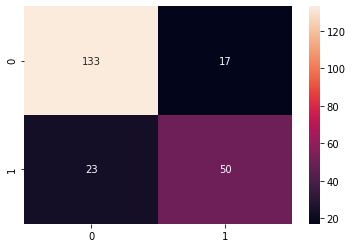

In [21]:
# Confusion Matrix
sns.heatmap(confusion_matrix(Y_split_test,Y_split_pred),annot=True,fmt='2.0f')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [22]:
print(Y_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 0 0 1 0 0 0]
